In [189]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Entropy

In [519]:
x = np.linspace(0, 10, 100)

# Image

In [44]:
x = np.random.randint(-100, 50, size=(90,90))

In [45]:
print(x)

[[-29 -61 -10 ...  -6 -65 -64]
 [-24 -13 -95 ... -85 -38 -54]
 [-84  41 -90 ... -84 -43 -59]
 ...
 [-37  -4  45 ... -34 -74 -46]
 [-80 -68 -28 ... -68  23 -94]
 [ -5   8 -34 ... -34  18 -42]]


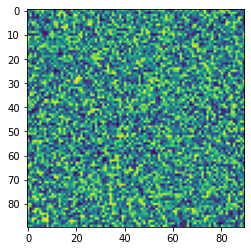

In [46]:
image = plt.imshow(x)

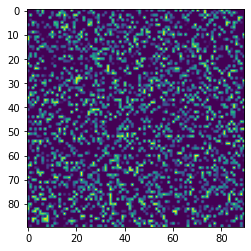

In [47]:
x[x < 0] = 0
image = plt.imshow(x)

[[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.  20.5 ...  0.   0.   4. ]
 [ 0.  20.5  0.  ... 22.5  0.   0. ]
 ...
 [ 0.   0.  22.5 ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   9. ]
 [ 0.   4.   0.  ...  0.   9.   0. ]]


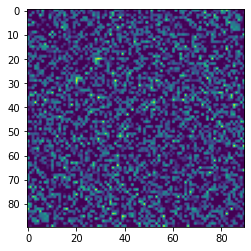

In [48]:
sym_x = (x + x.T)/2
np.fill_diagonal(sym_x, 0)
print(sym_x)
plt.imshow(sym_x)

In [60]:
cnt_edge = 90
edge_tensor = []
cnt_nodes = 50
for e in range(cnt_edge):
    x = np.random.randint(-100, 50, size=(cnt_nodes,cnt_nodes))
    x[x < 0] = 0
    sym_x = (x + x.T)/2
    np.fill_diagonal(sym_x, 0)
    edge_tensor.append(sym_x)
graph_tensor = np.array(edge_tensor)

In [61]:
graph_tensor.shape

(90, 50, 50)

In [65]:
D_m = np.apply_along_axis(np.sum, 2, graph_tensor, 0)
d = np.apply_along_axis(np.diag, 1, D_m)
L_m = d - graph_tensor

In [71]:
total_deg = np.sum(d)

In [76]:
tr = np.trace(L_m, axis1=1, axis2=2)
norm_tr = tr/total_deg
print(tr/total_deg)

[0.01189256 0.01032258 0.01128467 0.01126468 0.01147953 0.01087829
 0.01050689 0.0105935  0.01134573 0.01111312 0.01045804 0.01096378
 0.01101819 0.01118474 0.01129743 0.01046636 0.01139736 0.01083999
 0.01157335 0.01070897 0.01185981 0.01108925 0.01170048 0.0114229
 0.01141402 0.01102208 0.01102874 0.01136683 0.01112478 0.01084443
 0.01109758 0.01129965 0.01090993 0.01102152 0.01087885 0.01086719
 0.01089994 0.01068621 0.01203635 0.0115195  0.01102208 0.01128744
 0.01119695 0.01067566 0.01074949 0.01158334 0.01163497 0.01025985
 0.01135961 0.01101819 0.01067954 0.01089328 0.01212184 0.01069065
 0.01121361 0.01087663 0.01156613 0.01165329 0.01052244 0.01159
 0.01114643 0.01084498 0.01076115 0.01121527 0.0105563  0.01074228
 0.01137682 0.01058406 0.01154337 0.01094658 0.01163608 0.01108758
 0.01136627 0.01110757 0.01070564 0.01095546 0.01044471 0.01166051
 0.01167994 0.01169826 0.01177709 0.01085997 0.01083166 0.01102208
 0.01107593 0.01086441 0.01128356 0.01054908 0.01136516 0.01103707

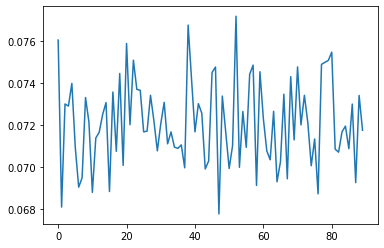

In [107]:
approx_entropy = -norm_tr*np.log2(norm_tr)
plt.plot(approx_entropy)

In [109]:
vals = []
for e in L_m:
    norm_e = (e - e.min())/(e.max() - e.min())
    eigval = np.linalg.eig(e/total_deg)[0]
    eigval[eigval <= 0] = 1
    p = -np.sum(eigval*np.log2(eigval))
    vals.append(p)

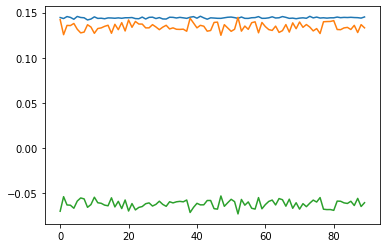

In [140]:
plt.plot(approx_entropy*2)
plt.plot(vals)
plt.plot(approx_entropy - vals)

# Generate many matrices

In [260]:
def generate_matrix(n: int, e: int, v_min: int, v_max: int, seed: int):
    np.random.seed(seed)
    cnt_edge = e
    edge_tensor = []
    cnt_nodes = n
    for e in range(cnt_edge):
        x = np.random.randint(v_min, v_max, size=(cnt_nodes,cnt_nodes))
        x[x < 0] = 0
        sym_x = (x + x.T)
        np.fill_diagonal(sym_x, 0)
        edge_tensor.append(sym_x)
    graph_tensor = np.array(edge_tensor)
    return graph_tensor

In [408]:
def laplacian_calc(graph_tensor):
    D_m = np.apply_along_axis(np.sum, 2, graph_tensor, 0)
    d = np.apply_along_axis(np.diag, 1, D_m)
    L_m = d - graph_tensor
    total_deg = np.sum(d)
    return D_m, L_m, d, total_deg

In [541]:
def entropy_approx(L_m, total_deg, d):
    val = []
    approx_entropy = 0.0
    for e in L_m:
        max_deg = np.max(np.diag(e))
        tr = np.trace(e)
        approx_entropy += -tr/total_deg*np.log2((tr/total_deg)/(tr/max_deg))
    return np.array(val), approx_entropy

In [409]:
def entropy_analytical(L_m, total_deg, d):
    vals = []
    for i,e in enumerate(L_m):
        norm_e = (e - e.min())/(e.max() - e.min())
        eigval = np.linalg.eig(norm_e)[0]
        eigval[eigval <= 0] = 1
        p = -np.sum(eigval*np.log2(eigval))
        vals.append(p)
    return np.array(vals)

In [465]:
def entropy_laplace(L_m, total_deg):
    df_min = np.min(L_m)
    df_max = np.max(L_m)
    e = np.linalg.eig((L_m - df_min)/(df_max - df_min))[0]
    e[e <= 0] = 1.0
    return -np.sum(e*np.log2(e))

## Check for matrices of the same node count

In [542]:
cnt_n = 4
cnt_e = 5
XX = []
XX2 = []
cnt = 4
offset = 0
offset_max = 310
padding = 2
tensors = []
eigvals = []
for i in np.linspace(offset, offset_max, cnt):
    tensor = generate_matrix(cnt_n, cnt_e, i + offset, i - offset + padding, seed=17)
    D_m, L_m, d, total_deg = laplacian_calc(tensor)
    norm_tr, approx_entropy = entropy_approx(L_m, total_deg, d)
    approx_analytical = entropy_analytical(L_m, total_deg, d)
    XX.append(approx_entropy)
    XX2.append(approx_analytical)
    #print(approx_entropy, approx_analytical)
    tensors.append(tensor)
    eigvals.append([np.sum(approx_entropy), np.sum(approx_analytical), entropy_laplace(L_m, total_deg)])
Z_approx = np.array(XX)
Z_analytical = np.array(XX2)

[[3.8980631671369252, 2.577695854399174, 4.299588699441792], [4.319375864214915, 0.03810608369572957, 0.05887658307665805], [4.320648073443401, 0.01915566373555006, 0.0296004950287158], [4.321076625569858, 0.012752272815057452, 0.0197064106094851]]


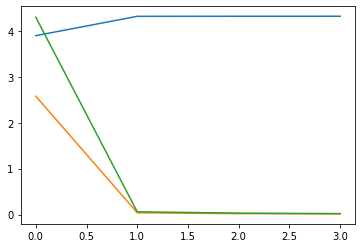

In [543]:
print(eigvals)
plt.plot(np.array(eigvals))

### Edge count

In [544]:
cnt_n = 4
cnt_e = 5
XX = []
XX2 = []
cnt = 4
offset = 0
offset_max = 310
padding = 2
tensors = []
eigvals = []
times = []
cnt_edge_min = 3
cnt_edge_max = 25
import time
for ed in np.arange(cnt_edge_min, cnt_edge_max):
    for i in np.linspace(offset, offset_max, cnt):
        tensor = generate_matrix(cnt_n, ed, i + offset, i - offset + padding, seed=17)
        D_m, L_m, d, total_deg = laplacian_calc(tensor)
        c0 = time.perf_counter_ns()
        norm_tr, approx_entropy = entropy_approx(L_m, total_deg, d)
        dt_0 = time.perf_counter_ns() - c0
        c1 = time.perf_counter_ns()
        approx_analytical = entropy_analytical(L_m, total_deg, d)
        dt_1 = time.perf_counter_ns() - c1
        c2 = time.perf_counter_ns()
        L = entropy_laplace(L_m, total_deg)
        dt_2 = time.perf_counter_ns() - c2
        XX.append(approx_entropy)
        XX2.append(approx_analytical)
        tensors.append(tensor)
        eigvals.append([np.sum(approx_entropy), np.sum(approx_analytical), L])
        times.append([dt_0, dt_1, dt_2])
Z_approx = np.array(XX)
Z_analytical = np.array(XX2)

C:\Users\keret\AppData\Local\Temp\ipykernel_38652\3149553122.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Z_analytical = np.array(XX2)


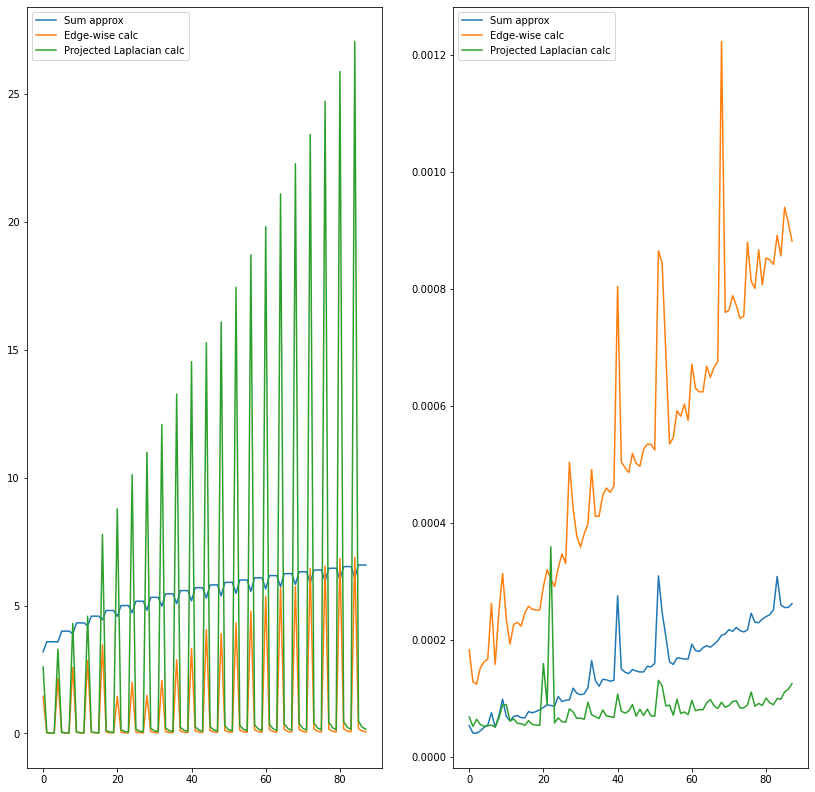

In [545]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1,2,1)
ax.plot(np.array(eigvals))
ax.legend(["Sum approx", "Edge-wise calc", "Projected Laplacian calc"])
ax = fig.add_subplot(1,2,2)
ax.plot(np.array(times)/1e9)
ax.legend(["Sum approx", "Edge-wise calc", "Projected Laplacian calc"])

### Many nodes

In [546]:
cnt_n = 100
cnt_e = 90
XX = []
XX2 = []
cnt_edge_min = 5
cnt = 150
offset = -210
offset_max = 310
padding = 2
tensors = []
eigvals = []
times = []
for ed in np.arange(cnt_edge_min, cnt_e):
    for i in np.linspace(offset, offset_max, cnt):
        tensor = generate_matrix(cnt_n, ed, i + offset, i - offset + padding, seed=17)
        D_m, L_m, d, total_deg = laplacian_calc(tensor)
        c0 = time.perf_counter_ns()
        norm_tr, approx_entropy = entropy_approx(L_m, total_deg, d)
        dt_0 = time.perf_counter_ns() - c0
        c1 = time.perf_counter_ns()
        approx_analytical = entropy_analytical(L_m, total_deg, d)
        dt_1 = time.perf_counter_ns() - c1
        c2 = time.perf_counter_ns()
        L = entropy_laplace(L_m, total_deg)
        dt_2 = time.perf_counter_ns() - c2
        XX.append(approx_entropy)
        XX2.append(approx_analytical)
        tensors.append(tensor)
        eigvals.append([np.sum(approx_entropy), np.sum(approx_analytical), L])
        times.append([dt_0, dt_1, dt_2])
Z_approx = np.array(XX)
Z_analytical = np.array(XX2)

KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1,2,1)
ax.plot(np.array(eigvals))
ax.legend(["Sum approx", "Edge-wise calc", "Projected Laplacian calc"])
ax = fig.add_subplot(1,2,2)
ax.plot(np.array(times)/1e9)
ax.legend(["Sum approx", "Edge-wise calc", "Projected Laplacian calc"])

In [444]:
print(np.array(eigvals))

[[   2.28443904+0.00000000e+00j -550.63258527-1.49637053e-29j
  -371.67925712-3.94430453e-31j]
 [   2.30482375+0.00000000e+00j -303.26502114-4.06756404e-31j
  -327.57442666+9.86076132e-32j]
 [   2.31180282+0.00000000e+00j -203.59534914+0.00000000e+00j
  -251.30401996-0.00000000e+00j]
 ...
 [   6.47571934+0.00000000e+00j  775.92229129+0.00000000e+00j
  1239.31353882+0.00000000e+00j]
 [   6.47571962+0.00000000e+00j  769.42466432+0.00000000e+00j
  1229.44270234+0.00000000e+00j]
 [   6.47571997+0.00000000e+00j  760.9275156 +0.00000000e+00j
  1216.52081136+0.00000000e+00j]]


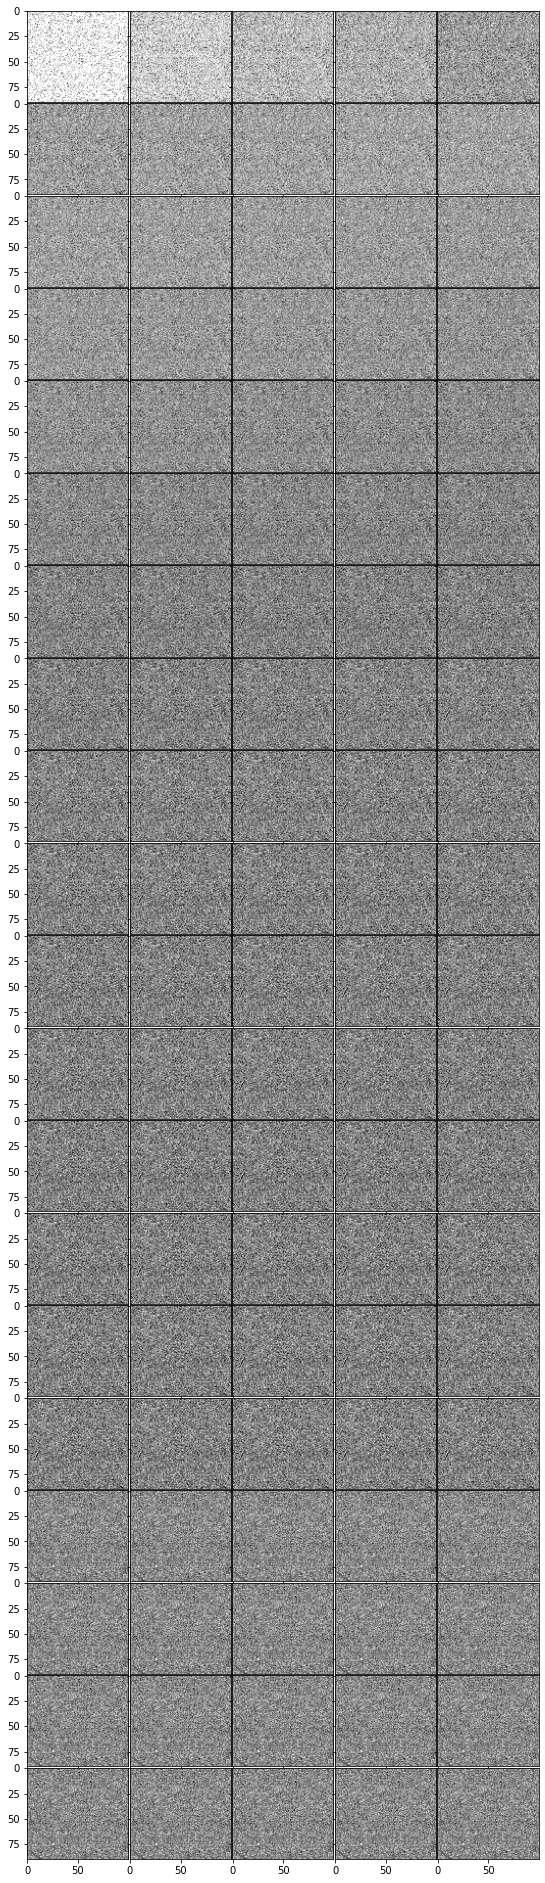

In [290]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 111, nrows_ncols=(cnt // 5, 5))
for ax, im in zip(grid, tensors):
    ax.imshow(np.sum(im, axis=2), cmap=cm.binary)

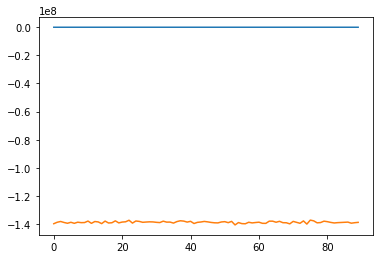

In [291]:
plt.plot(Z_approx[0,:])
plt.plot(Z_approx[-1,:])

C:\Anaconda3\envs\haizu\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


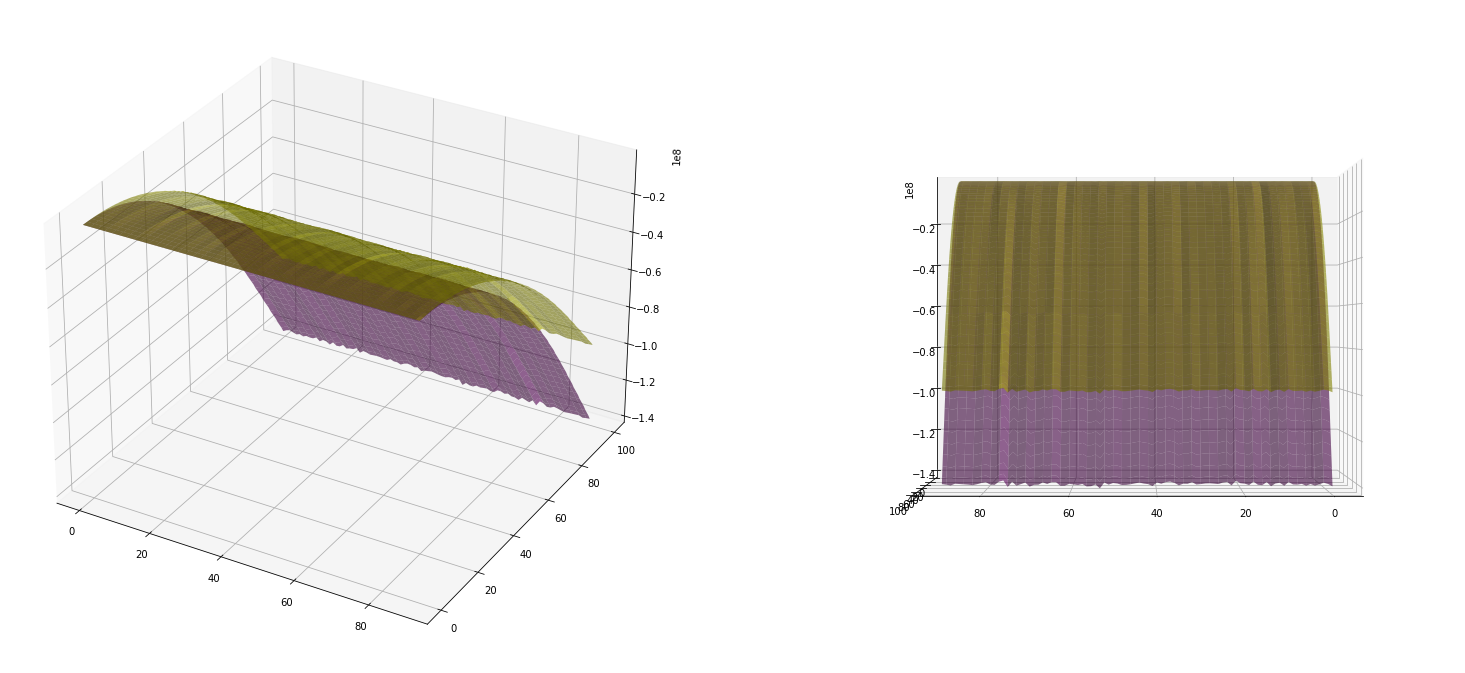

In [292]:
fig = plt.figure(figsize=(26,26))
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(0, cnt_e, 1)
Y = np.arange(0, cnt, 1)
X, Y = np.meshgrid(X,Y)
ax.plot_surface(X, Y, Z_approx, alpha=0.6, color='purple')
ax.plot_surface(X, Y, Z_analytical, alpha=0.6, color='yellow')

ax = fig.add_subplot(1, 2, 2, projection='3d')
X = np.arange(0, cnt_e, 1)
Y = np.arange(0, cnt, 1)
X, Y = np.meshgrid(X,Y)
ax.plot_surface(X, Y, Z_approx, alpha=0.6, color='purple')
ax.plot_surface(X, Y, Z_analytical, alpha=0.6, color='yellow')
ax.view_init(elev=0, azim=90)

TypeError: Image data of dtype complex128 cannot be converted to float

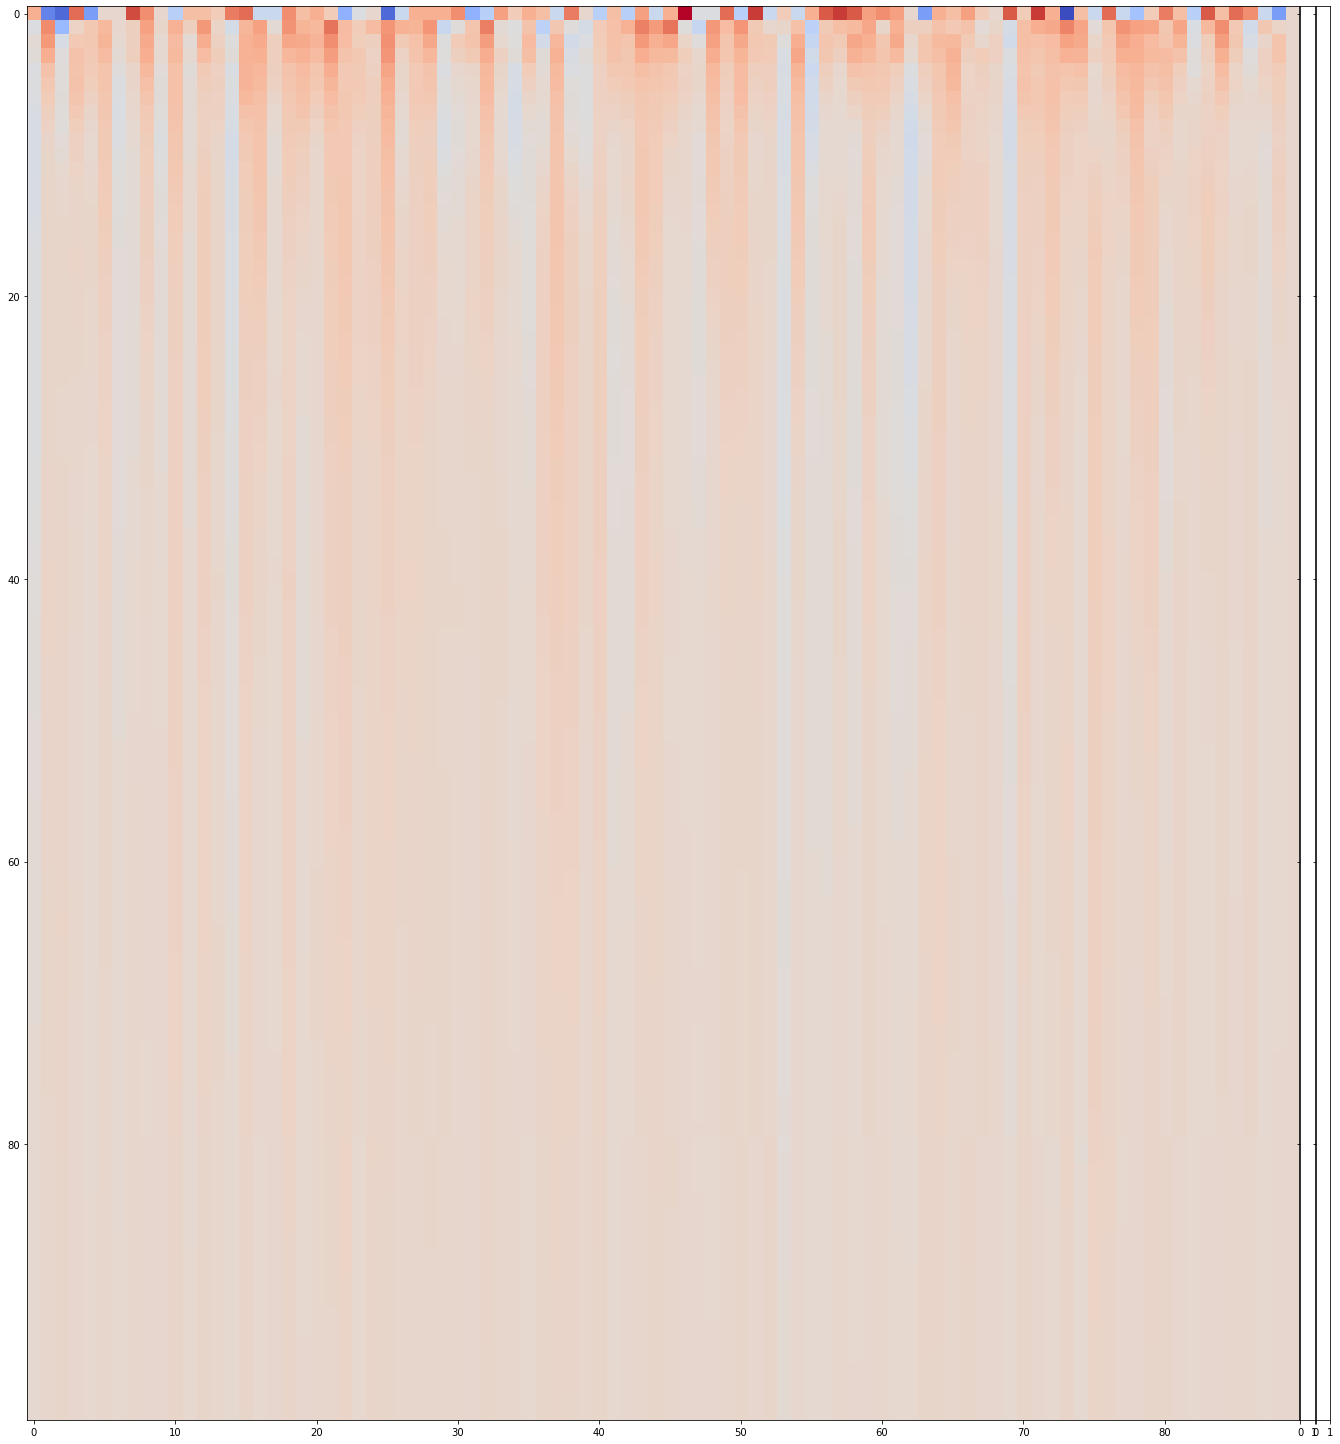

In [286]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(26,26))
grid = ImageGrid(fig, 111, nrows_ncols=(1,3))
for ax, im in zip(grid, [Z_approx, Z_analytical, Z_approx - Z_analytical]):
    ax.imshow(im, cmap=cm.coolwarm)

In [ ]:

fig = plt.figure(figsize=(14,8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
divergent_field = Z_approx - Z_analytical
ax.plot_surface(X, Y, divergent_field, alpha=0.6, cmap=cm.coolwarm)
# Zero Plane
xx, yy = np.meshgrid(np.arange(0, cnt_e, 1), np.arange(cnt, 1))
z = xx * 0.0

# plot the plane
ax.plot_surface(xx, yy, z, alpha=1.0)
# Next plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
divergent_field = Z_approx - Z_analytical
ax.plot_surface(X, Y, divergent_field, alpha=0.6, cmap=cm.coolwarm)
# Zero Plane
xx, yy = np.meshgrid(np.arange(cnt_e, 1), np.arange(cnt,1))
z = xx * 0.0

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.7)
ax.view_init(elev=60, azim=45)

## Fano graph

In [381]:
def fano_graph():
    edges = []
    # Edge def. 0-1-3
    edges.append(np.array([
        [0, 1, 0, 1, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]
    ]))
    # Edge def. 1-5-6
    edges.append(np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 1, 0]
    ]))
    # Edge def 2-3-5
    edges.append(np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]
    ]))
    # Edge def. 1-2-4
    edges.append(np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]
    ]))
    # Edge def. 3-4-6
    edges.append(np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0]
    ]))
    # Edge def. 0-4-5
    edges.append(np.array([
        [0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]
    ]))
    # Edge def. 0-2-6
    edges.append(np.array([
        [0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0]
    ]))
    # E-adjacency matrix
    adj_fano = np.array(edges)
    return adj_fano

In [405]:
fano = fano_graph()
D_m, L, d, total_deg = laplacian_calc(fano)

s,v,d = np.linalg.svd(L)
print(v)
print(L)
print(s)
print(d)

[[ 3.  3.  0.  0.  0.  0. -0.]
 [ 3.  3.  0.  0.  0.  0.  0.]
 [ 3.  3. -0.  0.  0.  0.  0.]
 [ 3.  3.  0.  0.  0. -0.  0.]
 [ 3.  3.  0. -0.  0.  0.  0.]
 [ 3.  3.  0.  0.  0.  0.  0.]
 [ 3.  3.  0.  0.  0.  0.  0.]]
[[[ 2 -1  0 -1  0  0  0]
  [-1  2  0 -1  0  0  0]
  [ 0  0  0  0  0  0  0]
  [-1 -1  0  2  0  0  0]
  [ 0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0]
  [ 0  2  0  0  0 -1 -1]
  [ 0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0]
  [ 0 -1  0  0  0  2 -1]
  [ 0 -1  0  0  0 -1  2]]

 [[ 0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0]
  [ 0  0  2 -1  0 -1  0]
  [ 0  0 -1  2  0 -1  0]
  [ 0  0  0  0  0  0  0]
  [ 0  0 -1 -1  0  2  0]
  [ 0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0]
  [ 0  2 -1  0 -1  0  0]
  [ 0 -1  2  0 -1  0  0]
  [ 0  0  0  0  0  0  0]
  [ 0 -1 -1  0  2  0  0]
  [ 0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0]